<a href="https://colab.research.google.com/github/ecerrillo/ArqCuantitiva/blob/main/test_contraste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


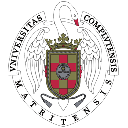
# Arqueología Cuantitativa. 2º del Grado de Arqueología de la Universidad Complutense de Madrid.

##Profesor: Enrique Cerrillo Cuenca, Unidad Docente de Prehistoria
## Tema 4

Explicación de las áreas de probabilidad en una distribución normal

In [ ]:
#@title Ejecutar celda para comenzar (contiene código de preparación) { display-mode: "form" }
import matplotlib.pyplot as plt #importa una biblioteca de gráficos
import numpy as np #importa una biblioteca de matrices (no necesitáis saber qué es)
import scipy.stats as stats #importa una biblioteca de estadística


In [ ]:
#@title Resolución del test de contraste de hipótesis (dos colas de la distribución) { vertical-output: true, display-mode: "form" }
H0 = "los datos de la variable se ajustan a una distribucion normal" #@param {type:"string"}
H1 = "los datos de la variable NO se ajustan a una distribucion normal" #@param {type:"string"}
niv_significacion = 0.05 #@param ["0.1","0.05","0.01"]{type:"raw"}
p_value = 0.01 #@param {type:"number"}

alfa = float(niv_significacion)

if p_value < niv_significacion:
  cad1='α = {}, p-value = {}. Teniendo en cuenta que p es menor o igual que α, tenemos que rechazar H0 y asumir H1. \n Es decir, {}'.format(alfa,p_value,H1)
else:
  cad1='α = {}, p-value = {}. Teniendo en cuenta que p es mayor que α, no podemos rechazar H0. \n Es decir, {}.'.format(alfa,p_value,H0)

print(cad1)
print()

val_crit = abs(stats.norm.ppf(alfa/2))

media, desvest = 0,1
int_inf = [-4,val_crit]
int_sup = [-1*val_crit,4]

x = np.linspace(media - 4*desvest, media + 4*desvest, 100)

plt.figure(figsize=(15,5))

plt.plot(x, stats.norm.pdf(x, media, desvest))
plt.axhline(0, color='k', linewidth=1)
plt.plot(stats.norm.ppf(p_value/2), 0, marker="o", markersize=15, markeredgecolor="red", label = 'z-score')

plt.ylabel('Densidad')
for i in range(0,2):
  px=np.arange(int_inf[i],int_sup[i],0.01)
  if i ==1:
    plt.fill_between(px, stats.norm(media, desvest).pdf(px), color='b', label='Área de rechazo')
  else:
    plt.fill_between(px, stats.norm(media, desvest).pdf(px), color='b')

plt.legend(loc="upper left")
